## STEP 1: Importing the DATA

In [75]:
import warnings 
warnings.filterwarnings('ignore') # importing module 'warnings' to get rid of all warnings 

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [77]:
#reading the train CSV file
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## STEP 2: Inspecting the Dataset

In [78]:
#lets check the current shape of the data 
data.shape

(1460, 81)

In [79]:
#lets check the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [81]:
#Seems lot of values showing as null however these are basically one of the categorical value
#lets include them in the data  
data.fillna({'Alley':'NoAlley','BsmtQual':'NoBsmt','BsmtCond':'NoBsmt','BsmtExposure':'NoBsmt','BsmtFinType1':'NoBsmt','BsmtFinType2':'NoBsmt','FireplaceQu':'NoFP',
 'GarageType':'NoGrg','GarageFinish':'NoGrg','GarageQual':'NoGrg','GarageCond':'NoGrg','PoolQC':'NoPool','Fence':'NoFence','MiscFeature':'None'},inplace=True)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [84]:
data.shape

(1460, 81)

In [85]:
round((data['LotFrontage'].isnull().sum()/data['LotFrontage'].shape[0])*100)

18

## STEP 3: Data Preparation

##### Checking the Missing values then imputing them or drop them


In [86]:
# Now lets check how many null value we have left for categorical and numerical feature's.
for i in data.columns:
    k=round((data[i].isnull().sum()/data[i].shape[0])*100)
    if k > 0:
        print("{} has null value of {}% ".format(i,k))
    else:
        pass

LotFrontage has null value of 18% 
MasVnrType has null value of 1% 
MasVnrArea has null value of 1% 
GarageYrBlt has null value of 6% 


In [87]:
#lets drop the 1% MasVnrType null data 
data = data[data['MasVnrType'].notnull()]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


In [88]:
#As years cant be imputed hence dropping null values of GarageYrBlt
data = data[data['GarageYrBlt'].notnull()]
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


In [89]:
#lets check the current shape of the data again
data.shape

(1371, 81)

In [90]:
#Lets replace null values of MasVnrArea with its median
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)

In [91]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


In [92]:
#LotFrontage has 18% of null values hence dropping this feature
data = data.drop(['LotFrontage'],axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


In [93]:
data.shape

(1371, 80)

## Looking at correlations

<AxesSubplot:>

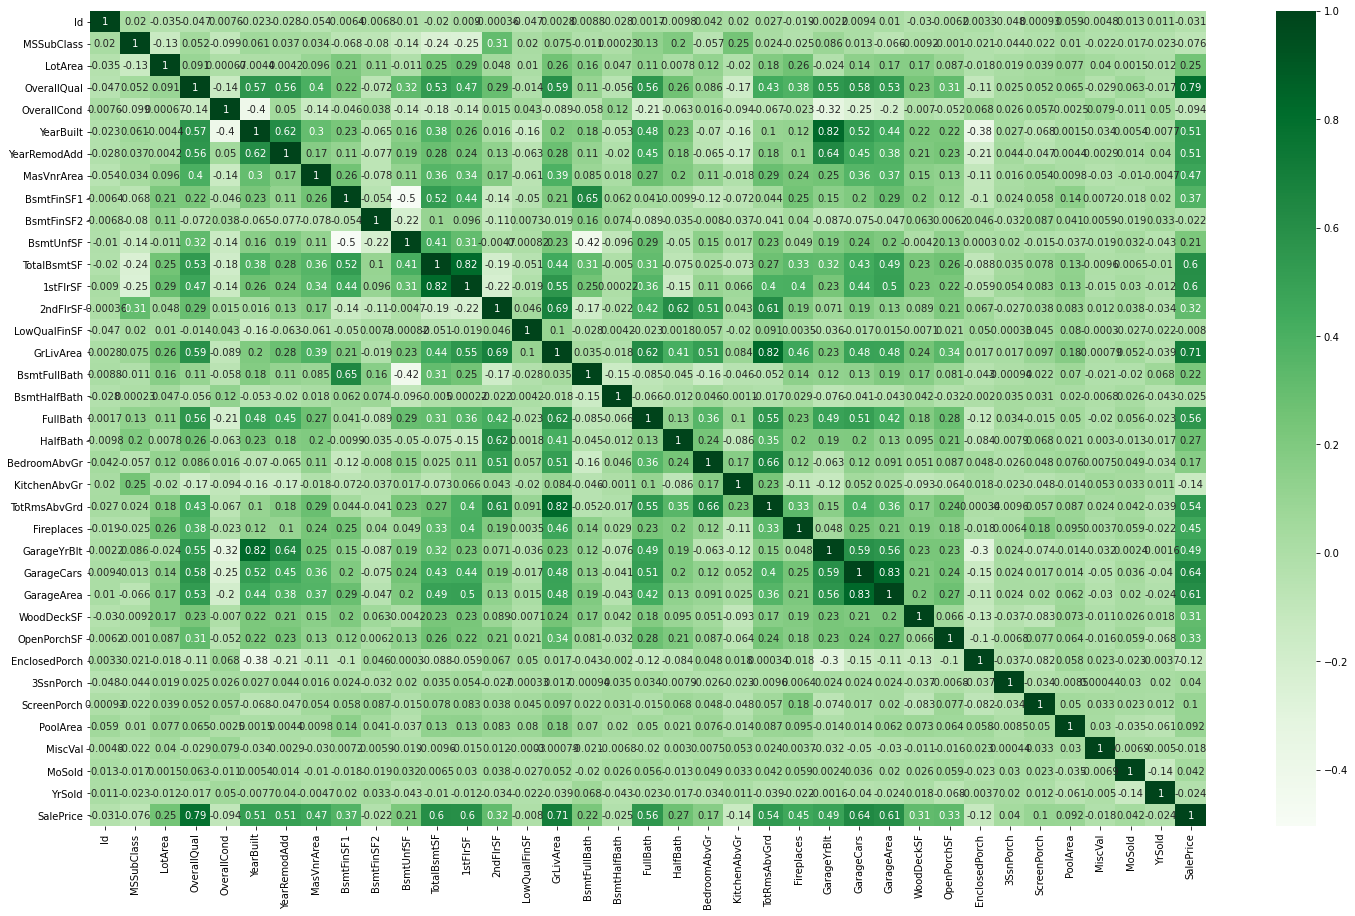

In [94]:
#Lets see the correlation matrix
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [95]:
#Creating a list of all continuous feature/column names
cont_col =  [i for i in data.columns if data[i].dtype == 'int64' or data[i].dtype == 'float64']

In [96]:
cont_col

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [97]:
#Creating a list of all categorical feature/column names
cat_col =  [i for i in data.columns if data[i].dtypes == 'object']

In [98]:
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### Step 5 : For categorical variables with multiple levels, create dummy features

In [99]:
# using get dummies to create dummy variable of categorical features
#dropping the first feature for reducing multicollinearity
dummies = pd.get_dummies(data[cat_col],drop_first=True)

In [100]:
dummies

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [101]:
# Adding the dummy data with the main data
data = pd.concat([data,dummies],axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,0,0,0,0,1,0,0,0,1,0


In [102]:
#Dropping the Original Categorical columns
data = data.drop(cat_col,axis=1)
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [103]:
data.shape

(1371, 254)

## Step 5 : Feature Scaling

In [104]:
data[cont_col] 

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [105]:
data.shape

(1371, 254)

In [106]:
#Instantiating StandardScaler class
scaler = StandardScaler()

In [107]:
#Scaling all continuous columns 
data[cont_col] = scaler.fit_transform(data[cont_col])

In [108]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.733331,0.095686,-0.218836,0.609623,-0.538540,1.028216,0.863585,0.471616,0.549502,-0.29376,...,0,0,0,0,1,0,0,0,1,0
1,-1.730957,-0.878767,-0.106323,-0.134627,2.237169,0.108701,-0.456942,-0.590840,1.142334,-0.29376,...,0,0,0,0,1,0,0,0,1,0
2,-1.728583,0.095686,0.055108,0.609623,-0.538540,0.960104,0.814676,0.287313,0.070006,-0.29376,...,0,0,0,0,1,0,0,0,1,0
3,-1.726210,0.339300,-0.111215,0.609623,-0.538540,-1.968720,-0.750393,-0.590840,-0.518467,-0.29376,...,0,0,0,0,1,0,0,0,0,0
4,-1.723836,0.095686,0.349597,1.353873,-0.538540,0.926048,0.716859,1.306404,0.438346,-0.29376,...,0,0,0,0,1,0,0,0,1,0


## Step 6: Doing Train Test Split

In [109]:
data.shape

(1371, 254)

In [110]:
# Creating seprate indipendent variable columns
Y = data.pop('SalePrice')

In [111]:
X = data

In [112]:
#Splitting the data into test and traing set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7,random_state=100)

In [113]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(959, 253)
(959,)
(412, 253)
(412,)


## Creating the first Linear Regression Model

In [114]:
#Instantiating Linear regression class
lm = LinearRegression()

In [115]:
#Fitting the Model in linear regression
lm.fit(X_train,y_train)

LinearRegression()

In [116]:
print(lm.intercept_)
print(lm.coef_)

-299162725983.31195
[ 1.23781918e-02  2.90264996e-02  1.07201858e-01  1.16308029e-01
  4.43451833e-02  8.22207327e-02  6.29126612e-02  2.88373492e-02
  8.00614663e+12  2.87399588e+12  7.74337076e+12 -7.60173387e+12
  2.25189008e+12  2.56737880e+12  2.35153002e+11 -3.03426828e+12
 -9.15527344e-03 -2.53295898e-03  7.17773438e-02  6.75659180e-02
 -4.07714844e-02 -5.55114746e-02  1.30859375e-01  1.56742096e-01
 -4.22973633e-02 -5.05523682e-02  1.75964355e-01  2.06298828e-02
  1.95312500e-03  5.92041016e-03  6.34765625e-03  2.52838135e-02
  8.01603425e+09 -1.46545410e-01 -1.09252930e-02 -1.59912109e-02
  7.87700653e-01  7.98187256e-01  8.16162109e-01  8.79882812e-01
  4.58263397e-01 -3.28825235e-01  3.60205173e-02  1.44592285e-01
 -2.17895508e-02  5.56335449e-02 -5.71441650e-02 -2.69668579e-01
 -1.30897522e-01 -8.48606110e-01  2.73406982e-01 -1.30615234e-01
 -9.36126709e-02  1.27105713e-02  1.40457153e-02 -6.25289917e-01
 -7.56912231e-02 -4.54284668e-01 -7.91778564e-02 -1.01837158e-01
 -9.0

### Doing Feature elimination with RFE 

In [117]:
rfe = RFE(lm,100) # Running RFE with 100 variables as output
rfe = rfe.fit(X_train,y_train)

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Id', False, 63),
 ('MSSubClass', False, 40),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 56),
 ('MasVnrArea', False, 135),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 134),
 ('BsmtHalfBath', False, 152),
 ('FullBath', False, 81),
 ('HalfBath', False, 142),
 ('BedroomAbvGr', False, 46),
 ('KitchenAbvGr', False, 137),
 ('TotRmsAbvGrd', False, 48),
 ('Fireplaces', False, 100),
 ('GarageYrBlt', False, 57),
 ('GarageCars', False, 99),
 ('GarageArea', False, 19),
 ('WoodDeckSF', False, 59),
 ('OpenPorchSF', False, 151),
 ('EnclosedPorch', False, 77),
 ('3SsnPorch', False, 116),
 ('ScreenPorch', False, 62),
 ('PoolArea', True, 1),
 ('MiscVal', False, 34),
 ('MoSold', False, 125),
 ('YrSold', False, 150),
 ('MSZoning_FV', Fals

In [119]:
# capturing the train predictor variables suggested by RFE
X_train_rfe = list(X_train.columns[rfe.support_==True])

In [120]:
# capturing the test predictor variables suggested by RFE
X_test_rfe = list(X_test.columns[rfe.support_==True])
X_test_rfe = X_test[X_test_rfe]

In [121]:
len(X_train_rfe)

100

In [122]:
X_train_rfe = X_train[X_train_rfe]

In [123]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(959, 100)
(412, 100)


### Creating final Linear regression model based on RFE features

In [124]:
#Again fitting the Linear Regression with RFE columns
lm.fit(X_train_rfe,y_train)

LinearRegression()

In [125]:
print(lm.coef_)
print(lm.intercept_)

[ 1.15443152e-01  1.48554135e-01  9.46324631e-02  1.95156986e-01
 -2.07923170e+12 -7.46389442e+11 -2.01098764e+12  1.97420391e+12
 -8.12121932e+11 -9.25899823e+11 -8.48056093e+10  1.09427891e+12
 -1.78132316e+10  7.47070312e-02  1.06979370e+00 -1.30371094e-01
 -1.35681152e-01 -4.26269531e-01  2.32252121e-01  3.77178192e-01
  2.30682373e-01  3.56582642e-01  3.24890137e-01  2.02728271e-01
  6.77612305e-01  1.69601440e-01  9.42077637e-02 -1.68449402e-01
  3.27671837e+11 -3.60340118e-01  3.09780797e+11 -3.94172668e-01
 -2.12356567e-01  2.77366885e+11  2.77366885e+11  2.77366885e+11
  2.77366885e+11  2.77366885e+11  1.10901955e+11  3.88268840e+11
  3.88268840e+11  1.10901955e+11  3.88268840e+11  1.10901955e+11
  1.10901955e+11 -2.40047455e-01 -1.29491185e+11 -1.46205902e-01
 -8.04443359e-02 -1.94519043e-01  8.76448195e+10  1.29491185e+11
 -3.41941833e-01  1.29318237e-01  1.73522949e-01  2.05078125e-01
 -3.91174316e-01 -4.14306641e-01 -2.09224701e-01 -1.87133789e-01
  2.98712424e+11 -1.31652

### Model Evaluation for Linear Regression

In [126]:
# Predicted values from train set  
y_pred_train = lm.predict(X_train_rfe)
# Predicted values from Test set 
y_pred_test = lm.predict(X_test_rfe)

In [127]:
#metrics on training set

R2 = r2_score(y_train,y_pred_train)
RSS = np.sum(np.square(y_train - y_pred_train))
MSE = mean_squared_error(y_train,-y_pred_train)
RMSE = np.sqrt(MSE)

print(f"TRAIN SET R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TRAIN SET R2 score is 0.9288083010656528, RSS is 64.02361128324114, MSE is 3.5545966831608955, RMSE is 1.8853638065797529


In [128]:
#metrics on Testing set

R2 = r2_score(y_test,y_pred_test)
RSS = np.sum(np.square(y_test - y_pred_test))
MSE = mean_squared_error(y_test,-y_pred_test)
RMSE = np.sqrt(MSE)

print(f"TEST SET: R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TEST SET: R2 score is -1.633760283770379e+21, RSS is 7.704052130505618e+23, MSE is 1.869915565652235e+21, RMSE is 43242520343.43321


In [129]:
#Seems Training set is performing very good and test set has failed completely 
#Which is a clear case of Overfitting

## Step 7 : Creating 2nd Ridge Regression Model

In [130]:
### Lets try this on Ridge and Lasso to overcome this overfitting issue

params = {'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,
                   1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,200,500,1000]}

ridge = Ridge()

#cross validation
folds = 5

model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring="neg_mean_absolute_error",
                        cv=folds,
                        verbose=1,
                        return_train_score=True                     
                 )
model_cv.fit(X_train_rfe,y_train)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Ridge model evaluation 

In [131]:
#Lets see the Ridge regression results 
results = pd.DataFrame(model_cv.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007034,0.002659,0.004614,0.002599,0.0001,{'alpha': 0.0001},-0.255251,-0.251751,-0.215591,-0.219268,...,-0.244896,0.024870,24,-0.180818,-0.179917,-0.177969,-0.177558,-0.176336,-0.178520,0.001627
1,0.007783,0.003059,0.004411,0.002270,0.001,{'alpha': 0.001},-0.255207,-0.251776,-0.215366,-0.219290,...,-0.244738,0.024746,23,-0.180826,-0.179946,-0.178044,-0.177628,-0.176397,-0.178568,0.001604
2,0.007696,0.004374,0.003169,0.002658,0.01,{'alpha': 0.01},-0.254772,-0.251992,-0.213363,-0.219507,...,-0.243299,0.023646,22,-0.180910,-0.180229,-0.178980,-0.178490,-0.177059,-0.179133,0.001349
3,0.007932,0.002022,0.003175,0.002345,0.05,{'alpha': 0.05},-0.253164,-0.252322,-0.208582,-0.220086,...,-0.239539,0.021269,20,-0.181695,-0.181263,-0.183539,-0.182547,-0.180471,-0.181903,0.001058
4,0.005454,0.003392,0.003972,0.003273,0.1,{'alpha': 0.1},-0.251682,-0.252527,-0.207486,-0.220648,...,-0.237495,0.019609,12,-0.182796,-0.182149,-0.187830,-0.186892,-0.184471,-0.184828,0.002223


In [132]:
results[['param_alpha','mean_train_score','mean_test_score']].head()

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.178520,-0.244896
1,0.001,-0.178568,-0.244738
2,0.01,-0.179133,-0.243299
3,0.05,-0.181903,-0.239539
4,0.1,-0.184828,-0.237495


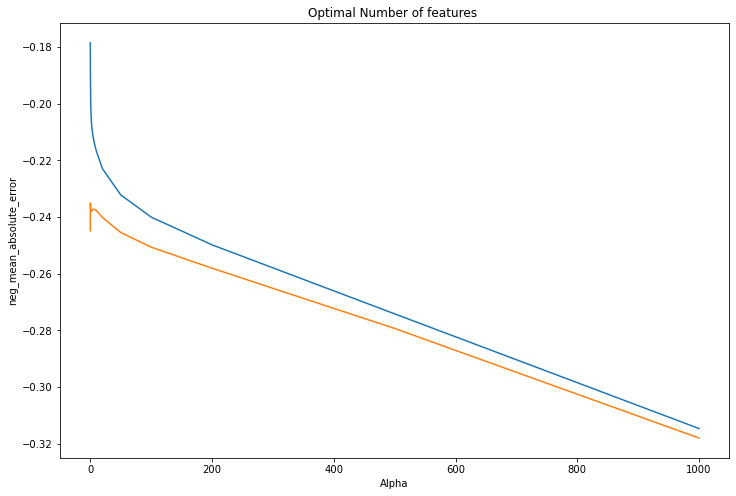

In [133]:
plt.figure(figsize=[12,8])

plt.plot(results['param_alpha'],results['mean_train_score'])
plt.plot(results['param_alpha'],results['mean_test_score'])

plt.title("Optimal Number of features ")
plt.xlabel("Alpha")
plt.ylabel("neg_mean_absolute_error")
plt.show()

print(model_cv.best_params_)

In [134]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(959, 100)
(412, 100)


In [135]:
print(model_cv.best_params_)

{'alpha': 0.3}


In [136]:
ridge = Ridge(alpha=0.6)

ridge.fit(X_train_rfe,y_train)

y_pred_train_ = ridge.predict(X_train_rfe)
y_pred_test_ = ridge.predict(X_test_rfe)


In [137]:
#metrics on training set

R2 = r2_score(y_train,y_pred_train_)
RSS = np.sum(np.square(y_train - y_pred_train_))
MSE = mean_squared_error(y_train,-y_pred_train_)
RMSE = np.sqrt(MSE)

print(f"TRAIN SET R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TRAIN SET R2 score is 0.9016944699795254, RSS is 88.40742860804684, MSE is 3.428414449233128, RMSE is 1.8515978097937813


In [138]:
#metrics on Testing set

R2 = r2_score(y_test,y_pred_test_)
RSS = np.sum(np.square(y_test - y_pred_test_))
MSE = mean_squared_error(y_test,-y_pred_test_)
RMSE = np.sqrt(MSE)

print(f"TEST SET: R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TEST SET: R2 score is 0.8045731990097653, RSS is 92.15417203386491, MSE is 3.9636011289035893, RMSE is 1.990879486283283


## Step 8: Creating 3rd Lasso Regression Model

In [139]:
#Lasso

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring="neg_mean_absolute_error",
                        cv=folds,
                        verbose=1,
                        return_train_score=True                     
                 )
model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

### Lasso Model Evaluation

In [140]:
#checking the model results
results = pd.DataFrame(model_cv.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070859,0.023043,0.002450,0.000812,0.0001,{'alpha': 0.0001},-0.259217,-0.251542,-0.190247,-0.220809,...,-0.269132,0.081119,3,-0.182185,-0.181931,-0.181302,-0.180434,-0.178428,-0.180856,0.001356
1,0.040778,0.013592,0.003489,0.002258,0.001,{'alpha': 0.001},-0.252769,-0.248940,-0.201353,-0.226115,...,-0.246424,0.033719,1,-0.190942,-0.194989,-0.206651,-0.205269,-0.201053,-0.199781,0.006000
2,0.009954,0.001199,0.000720,0.001015,0.01,{'alpha': 0.01},-0.262499,-0.280313,-0.250426,-0.250833,...,-0.263485,0.011934,2,-0.254301,-0.234074,-0.260071,-0.255890,-0.253097,-0.251486,0.009020
3,0.010759,0.003075,0.002823,0.001007,0.05,{'alpha': 0.05},-0.301860,-0.317867,-0.288018,-0.284383,...,-0.298684,0.011859,4,-0.296926,-0.275410,-0.301627,-0.297553,-0.298164,-0.293936,0.009405
4,0.004120,0.002775,0.002668,0.003029,0.1,{'alpha': 0.1},-0.314560,-0.326073,-0.311832,-0.306681,...,-0.315982,0.006789,5,-0.318853,-0.290217,-0.321719,-0.318143,-0.316806,-0.313148,0.011577


In [141]:
results[['param_alpha','mean_train_score','mean_test_score']].head()

,param_alpha,mean_train_score,mean_test_score
0,0.0001,-0.180856,-0.269132
1,0.001,-0.199781,-0.246424
2,0.01,-0.251486,-0.263485
3,0.05,-0.293936,-0.298684
4,0.1,-0.313148,-0.315982


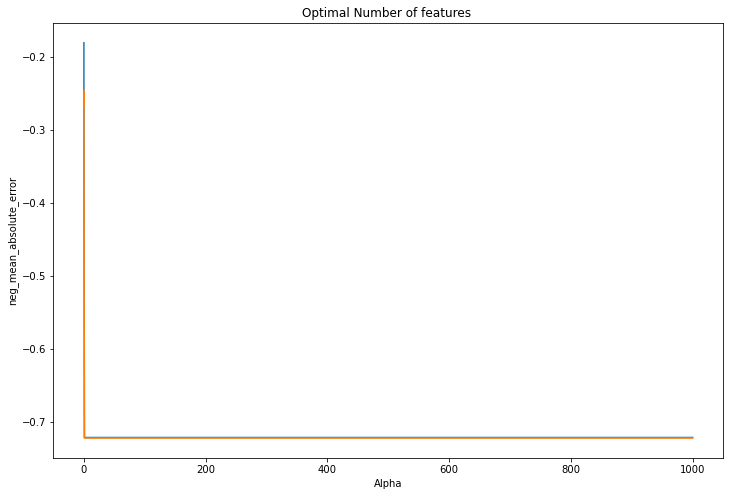

In [142]:
plt.figure(figsize=[12,8])

plt.plot(results['param_alpha'],results['mean_train_score'])
plt.plot(results['param_alpha'],results['mean_test_score'])

plt.title("Optimal Number of features ")
plt.xlabel("Alpha")
plt.ylabel("neg_mean_absolute_error")
plt.show()

In [143]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [144]:
lasso = Lasso(alpha=0.002)

lasso.fit(X_train_rfe,y_train)

y_pred_train_ = lasso.predict(X_train_rfe)
y_pred_test_ = lasso.predict(X_test_rfe)

In [145]:
lasso.coef_

array([ 6.96807527e-02,  2.32048035e-01,  9.29373685e-02,  1.59596001e-01,
        5.79216237e-02,  1.88677416e-02, -0.00000000e+00,  1.70879901e-02,
        5.92065222e-02,  0.00000000e+00,  1.71403262e-02,  3.35621501e-01,
       -1.99548107e-02,  1.03289703e-01,  0.00000000e+00, -0.00000000e+00,
       -4.05101178e-02, -3.00729321e-02,  7.11123762e-02,  2.81006898e-01,
        0.00000000e+00,  3.92633765e-01,  4.43758359e-01,  1.60948895e-01,
        5.39577902e-01,  0.00000000e+00,  1.18468492e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -2.33833858e-01,
       -2.14511735e-01, -6.73323624e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.80462317e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -5.73658418e-02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [146]:
#metrics on training set

R2 = r2_score(y_train,y_pred_train_)
RSS = np.sum(np.square(y_train - y_pred_train_))
MSE = mean_squared_error(y_train,-y_pred_train_)
RMSE = np.sqrt(MSE)

print(f"TRAIN SET R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TRAIN SET R2 score is 0.8717340922925314, RSS is 115.35118193384015, MSE is 3.3290065615835713, RMSE is 1.8245565383357052


In [147]:
#metrics on Testing set

R2 = r2_score(y_test,y_pred_test_)
RSS = np.sum(np.square(y_test - y_pred_test_))
MSE = mean_squared_error(y_test,-y_pred_test_)
RMSE = np.sqrt(MSE)

print(f"TEST SET: R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TEST SET: R2 score is 0.805121221414439, RSS is 91.89575020685446, MSE is 3.8391035838505982, RMSE is 1.9593630556511465


In [74]:
        #####################################END############################################

### Checking the answers of the questions

In [72]:
data_corr = X_test_rfe
data_corr['Sales_price'] = y_pred_test_
data_corr.head()

,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,MiscFeature_None,MiscFeature_Shed,SaleType_Con,SaleType_New,SaleType_Oth,SaleCondition_Partial,Sales_price
1142,-0.070613,1.353873,-0.538540,1.130384,1.517213,-0.29376,-0.573753,0.902423,0.753296,2.296186,...,0,0,1,1,0,0,1,0,1,2.225455
763,-0.122956,1.353873,-0.538540,0.891991,1.545547,-0.29376,-1.085296,0.411191,0.239370,1.692879,...,0,0,1,1,0,0,0,0,0,1.464467
1128,0.108527,0.609623,-0.538540,1.062272,-0.989245,-0.29376,0.622852,-0.518479,-0.853373,1.727028,...,0,0,1,1,0,0,0,0,0,0.393090
424,-0.165026,-0.134627,-0.538540,-0.572421,0.353344,-0.29376,0.021169,0.282644,0.052487,-0.804588,...,0,0,1,1,0,0,0,0,0,-0.604142
407,0.478351,-0.134627,1.311933,-1.968720,-0.989245,-0.29376,0.607077,-0.534547,-0.871542,1.107784,...,0,0,1,1,0,0,0,0,0,-0.215771


<AxesSubplot:>

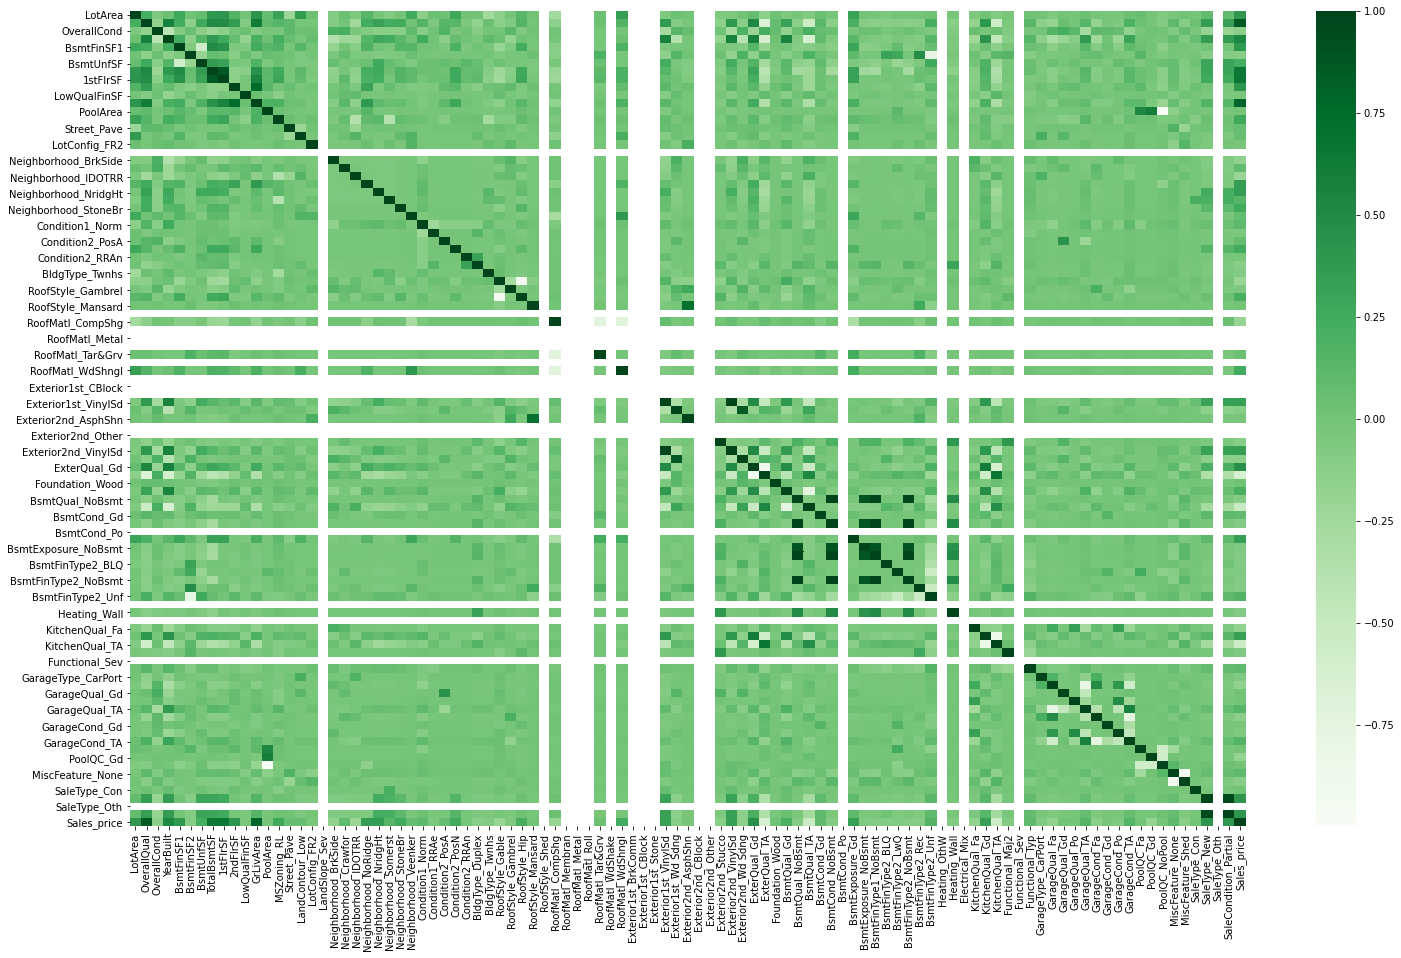

In [73]:
#Lets see the correlation matrix
plt.figure(figsize=(25,15))
sns.heatmap(data_corr.corr(),cmap='Greens')

In [180]:
X_test_rfe.YearBuilt

1142    1.130384
763     0.891991
1128    1.062272
424    -0.572421
407    -1.968720
          ...   
820     1.028216
1146    0.415206
1386    0.176813
453     1.198496
178     1.198496
Name: YearBuilt, Length: 412, dtype: float64

In [181]:
X_train_rfe.shape

(959, 100)

In [182]:
X_test_rfe.shape

(412, 100)

In [183]:
best_pred = ['OverallQual','GrLivArea','TotalBsmtSF','1stFlrSF','YearBuilt']

In [184]:
X_train_Q3 = X_train_rfe.drop(best_pred,axis=1)

In [185]:
X_test_Q3 = X_test_rfe.drop(best_pred,axis=1)

In [186]:
print(X_test_Q3.shape)
print(X_train_Q3.shape)

(412, 95)
(959, 95)


In [187]:
#Lasso

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring="neg_mean_absolute_error",
                        cv=folds,
                        verbose=1,
                        return_train_score=True                     
                 )
model_cv.fit(X_train_Q3,y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [188]:
#checking the model results
results = pd.DataFrame(model_cv.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.059621,0.019935,0.002801,7.482011e-04,0.0001,{'alpha': 0.0001},-0.318777,-0.286476,-0.239709,-0.269360,...,-0.320682,0.088005,3,-0.218342,-0.224137,-0.218879,-0.219168,-0.218017,-0.219709,0.002250
1,0.021804,0.009991,0.002601,4.900189e-04,0.001,{'alpha': 0.001},-0.310040,-0.281336,-0.248447,-0.284907,...,-0.298412,0.039638,1,-0.230268,-0.236500,-0.245592,-0.245834,-0.241170,-0.239873,0.005892
2,0.006600,0.000490,0.002001,3.873843e-07,0.01,{'alpha': 0.01},-0.321340,-0.316777,-0.298502,-0.321210,...,-0.313702,0.008536,2,-0.291356,-0.283552,-0.301727,-0.301299,-0.299205,-0.295428,0.007015
3,0.005401,0.000490,0.002800,3.999242e-04,0.05,{'alpha': 0.05},-0.398738,-0.395032,-0.361465,-0.358670,...,-0.374898,0.018013,4,-0.366900,-0.360823,-0.380773,-0.375185,-0.367890,-0.370314,0.006939
4,0.004602,0.000490,0.002800,4.001381e-04,0.1,{'alpha': 0.1},-0.457181,-0.466976,-0.434679,-0.422416,...,-0.440281,0.018729,5,-0.436007,-0.419503,-0.446648,-0.444021,-0.438407,-0.436917,0.009502


In [189]:
print(model_cv.best_params_)


{'alpha': 0.001}


In [190]:

lasso = Lasso(alpha=0.001)

lasso.fit(X_train_Q3,y_train)

y_pred_train_ = lasso.predict(X_train_Q3)
y_pred_test_ = lasso.predict(X_test_Q3)

In [191]:
#metrics on training set

R2 = r2_score(y_train,y_pred_train_)
RSS = np.sum(np.square(y_train - y_pred_train_))
MSE = mean_squared_error(y_train,-y_pred_train_)
RMSE = np.sqrt(MSE)

print(f"TRAIN SET R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TRAIN SET R2 score is 0.8636639986220933, RSS is 122.60872105580933, MSE is 3.2765971421973474, RMSE is 1.810137326889136


In [192]:
#metrics on Testing set

R2 = r2_score(y_test,y_pred_test_)
RSS = np.sum(np.square(y_test - y_pred_test_))
MSE = mean_squared_error(y_test,-y_pred_test_)
RMSE = np.sqrt(MSE)

print(f"TEST SET: R2 score is {R2}, RSS is {RSS}, MSE is {MSE}, RMSE is {RMSE}")

TEST SET: R2 score is 0.7669180981016148, RSS is 109.91056281271025, MSE is 3.748115333194086, RMSE is 1.9360049930705463


In [194]:
data_corr = X_test_Q3
data_corr['Sales_price'] = y_pred_test_
data_corr.head()

,LotArea,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,PoolArea,MSZoning_RL,Street_Pave,...,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,MiscFeature_None,MiscFeature_Shed,SaleType_Con,SaleType_New,SaleType_Oth,SaleCondition_Partial,Sales_price
1142,-0.070613,-0.538540,1.517213,-0.29376,-0.573753,2.296186,-0.103377,-0.070897,1,1,...,0,0,1,1,0,0,1,0,1,2.266043
763,-0.122956,-0.538540,1.545547,-0.29376,-1.085296,1.692879,-0.103377,-0.070897,1,1,...,0,0,1,1,0,0,0,0,0,1.410398
1128,0.108527,-0.538540,-0.989245,-0.29376,0.622852,1.727028,-0.103377,-0.070897,1,1,...,0,0,1,1,0,0,0,0,0,0.417056
424,-0.165026,-0.538540,0.353344,-0.29376,0.021169,-0.804588,-0.103377,-0.070897,1,1,...,0,0,1,1,0,0,0,0,0,-0.530123
407,0.478351,1.311933,-0.989245,-0.29376,0.607077,1.107784,-0.103377,-0.070897,1,1,...,0,0,1,1,0,0,0,0,0,0.179048


<AxesSubplot:>

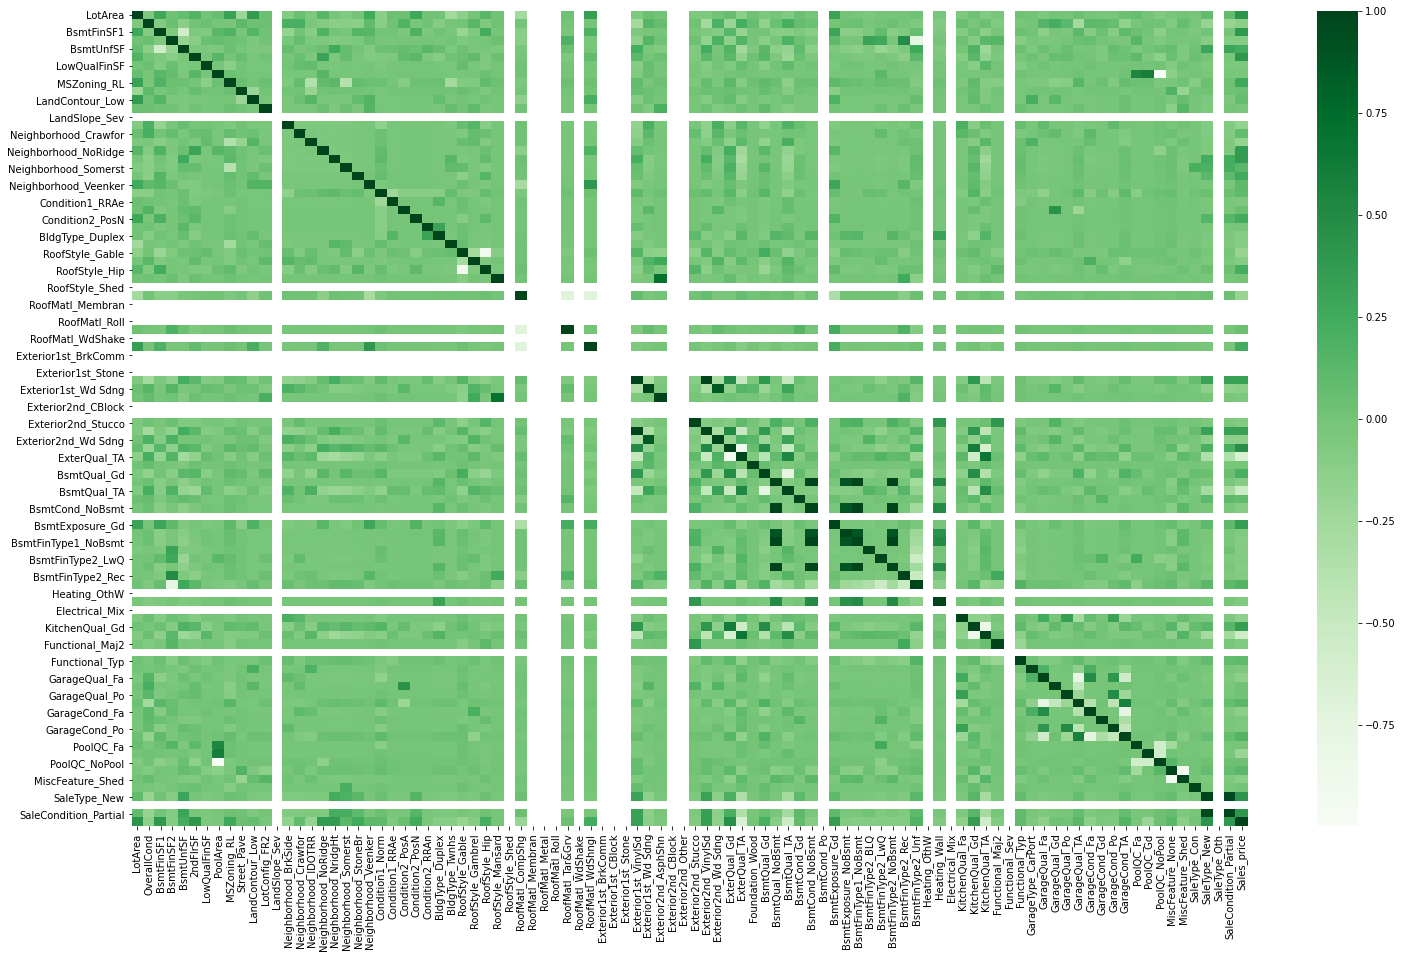

In [196]:
#Lets see the correlation matrix
plt.figure(figsize=(25,15))
sns.heatmap(data_corr.corr(),cmap='Greens')

In [ ]:
best_5 = ['LotArea','SaleType_New','BsmtFinSF1','ExterQual_Gd','Exterior2nd_VinylSd']
X_train_Q3.Exterior2nd_VinylSd